# **Download Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install kaggle

In [5]:
import os
os.environ['TWO_CENTURIES_OF_UM_RACES'] = '/content/drive/MyDrive/Colab Notebooks/kaggle'

In [ ]:
!kaggle datasets download -d aiaiaidavid/the-big-dataset-of-ultra-marathon-running

In [6]:
import pandas as pd
import seaborn as sns

In [ ]:
import zipfile

# Define the path to your zip file
file_path = '/content/the-big-dataset-of-ultra-marathon-running.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/kaggle')  # Replace 'destination_folder' with your desired folder

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/TWO_CENTURIES_OF_UM_RACES')

<ipython-input-7-c0635246da1f>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/TWO_CENTURIES_OF_UM_RACES')


In [ ]:
df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


# **Check Dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7117634 entries, 0 to 7117633
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 705.9+ MB


In [9]:
df.shape

(7117634, 13)

In [10]:
df.describe()

,Year of event,Event number of finishers,Athlete year of birth,Athlete ID
count,7.117634e+06,7.117634e+06,6.558280e+06,7.117634e+06
mean,2.012990e+03,1.310716e+03,1.970613e+03,5.275223e+05
std,9.074683e+00,2.973447e+03,1.264591e+01,4.634639e+05
min,1.798000e+03,0.000000e+00,1.193000e+03,0.000000e+00
25%,2.011000e+03,8.700000e+01,1.963000e+03,1.304470e+05
50%,2.016000e+03,2.270000e+02,1.972000e+03,3.775990e+05
75%,2.019000e+03,7.690000e+02,1.980000e+03,9.164148e+05
max,2.022000e+03,2.002700e+04,2.021000e+03,1.600755e+06


# **Clean up data**


In [11]:
# Check missing values
missing_data = df.isna().sum()
print(missing_data)

Year of event                      0
Event dates                        0
Event name                         0
Event distance/length           1053
Event number of finishers          0
Athlete performance                2
Athlete club                 2672972
Athlete country                    3
Athlete year of birth         559354
Athlete gender                     4
Athlete age category          556229
Athlete average speed            224
Athlete ID                         0
dtype: int64


In [12]:
# Remove the missing rows
df_cleaned = df.dropna(subset=['Event distance/length', 'Athlete performance', 'Athlete country', 'Athlete gender', 'Athlete average speed'])
missing_data_c = df_cleaned.isna().sum()
print(missing_data_c)

Year of event                      0
Event dates                        0
Event name                         0
Event distance/length              0
Event number of finishers          0
Athlete performance                0
Athlete club                 2672958
Athlete country                    0
Athlete year of birth         559263
Athlete gender                     0
Athlete age category          556138
Athlete average speed              0
Athlete ID                         0
dtype: int64


In [59]:
# Remove dulicate values
df1 = df_cleaned.drop_duplicates()
df1.shape

(7116304, 13)

# **Analysing and Visualising Data**

### **1. Participation Trends Over Time**
### How has the number of participants in ultramarathons changed from 1798 to 2022? Identify any significant trends or changes in participation over the years.

In [14]:
participation_trends = df1.groupby('Year of event')['Athlete ID'].nunique()
print(participation_trends)

Year of event
1798         1
1800         1
1801         3
1802         1
1805         1
         ...  
2018    374882
2019    417113
2020    159842
2021    244411
2022    288271
Name: Athlete ID, Length: 137, dtype: int64


In [15]:
print(participation_trends.index)
print(participation_trends.values)

Index([1798, 1800, 1801, 1802, 1805, 1807, 1837, 1861, 1863, 1870,
       ...
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int64', name='Year of event', length=137)
[     1      1      3      1      1      2      1      1      1      1
      1      3     20      5     33     16     18      7     11      9
     15     11      5      1      1    221      1     47      5      6
      3      6     10     11     11     93     21     10     13     15
     30     15      7     17      2     21     30     33     17     25
     20     37     81     51     51     43     42     57     47     33
     52     24     37     21     10      1      1      1     32     31
     54     38     52     57    104     74    102    116    131    115
    113    162    254    318    402    476    769    923   1031   1287
   1640   2062   2487   3575   4310   5443   5821   7737   8828  11342
  12701  13706  15946  18161  19498  21336  23242  22941  25599   9576
  32871  33100  36

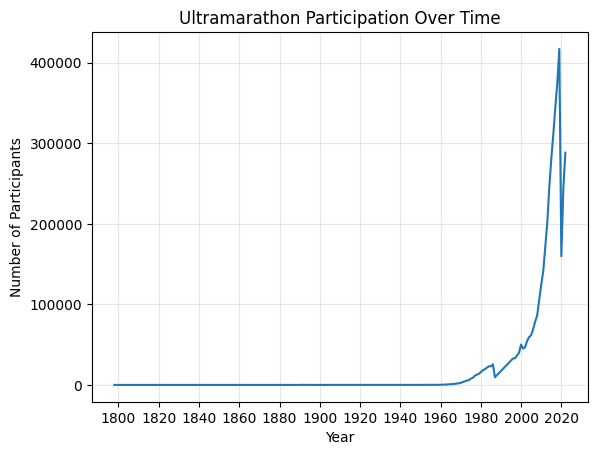

In [16]:
import matplotlib.pyplot as plt
import numpy as np
# Plot the number of participants over time
plt.plot(participation_trends.index, participation_trends.values)
plt.title('Ultramarathon Participation Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
years = np.arange(1800, 2021, 20) #
plt.xticks(years)
plt.grid(True, alpha = 0.3)
plt.show()

### **2. Gender Distribution Analysis:**
### What is the gender distribution of ultramarathon participants? Has there been a notable change in gender participation over the years?

In [17]:
gender_df = df1['Athlete gender'].value_counts()
print(gender_df.head())

Athlete gender
M    5723463
F    1392795
X         46
Name: count, dtype: int64


Athlete gender
M    5723463
F    1392795
Name: count, dtype: int64


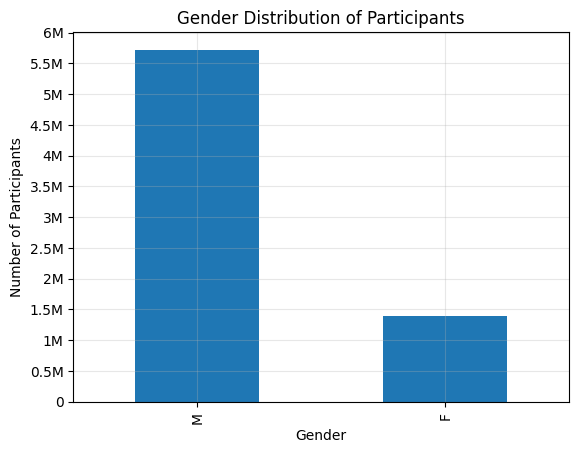

In [18]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows with gender "M" or "F"
gender_df = df1[df1['Athlete gender'].isin(["M", "F"])]

# Count the number of occurrences for each gender
gender_counts = gender_df['Athlete gender'].value_counts()
print(gender_counts)
# Plotting the gender distribution

gender_counts.plot(kind='bar')
plt.title("Gender Distribution of Participants")
plt.xlabel("Gender")
plt.ylabel("Number of Participants")
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, 5500000, 6000000],
           ['0', '0.5M', '1M', '1.5M', '2M', '2.5M', '3M', '3.5M', '4M', '4.5M', '5M', '5.5M', '6M'])
plt.grid(True, alpha = 0.3)
plt.show()

### **3. Age Category Analysis:**
### What are the most common age categories among participants, and how do these categories correlate with performance metrics like average speed?

In [62]:
age_category_distribution = df1['Athlete age category'].value_counts()

The error occurred because the data type was not numeric. I had to convert it to a float.

In [48]:
age_speed_correlation = df1.groupby('Athlete age category')['Athlete average speed'].mean()

TypeError: agg function failed [how->mean,dtype->object]

In [49]:
print(df1['Athlete average speed'].unique())

['10.286' '9.501' '9.472' ... '09:48:55' '14.745' '20.087']


Some values were incorrectly formatted as 09:48:55. I need to convert them to hours

In [63]:
def time_to_float2(time_str):
  """Converts a time string in HH:MM:SS format to a float representing the hour.
  Returns the original string if conversion fails."""
  if isinstance(time_str, str):
      try:
          hour, _, _ = time_str.split(':')
          return float(hour)
      except ValueError:
          return time_str
  return np.nan

In [64]:
df1['Athlete average speed (hours)'] = df1['Athlete average speed'].apply(time_to_float2)

<ipython-input-64-8000353ef71b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Athlete average speed (hours)'] = df1['Athlete average speed'].apply(time_to_float2)


In [65]:
print(df1['Athlete average speed (hours)'])

0          10.286
1           9.501
2           9.472
3           8.976
4           8.469
            ...  
7117629      4.92
7117630     4.895
7117631     4.895
7117632     4.888
7117633     4.884
Name: Athlete average speed (hours), Length: 7116304, dtype: object


In [66]:
df1['Athlete average speed (hours)'] = df1['Athlete average speed (hours)'].astype(float)

<ipython-input-66-f3923bc1045f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Athlete average speed (hours)'] = df1['Athlete average speed (hours)'].astype(float)


In [67]:
print(df1['Athlete average speed (hours)'].dtypes)

float64


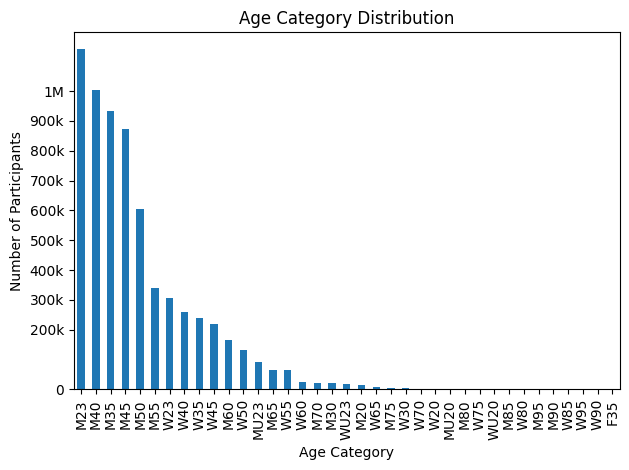

In [68]:
age_category_distribution.plot(kind='bar', title='Age Category Distribution')
plt.xlabel('Age Category')
plt.ylabel('Number of Participants')
plt.yticks([0, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000],
           ['0', '200k', '300k', '400k', '500k', '600k', '700k', '800k', '900k', '1M'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

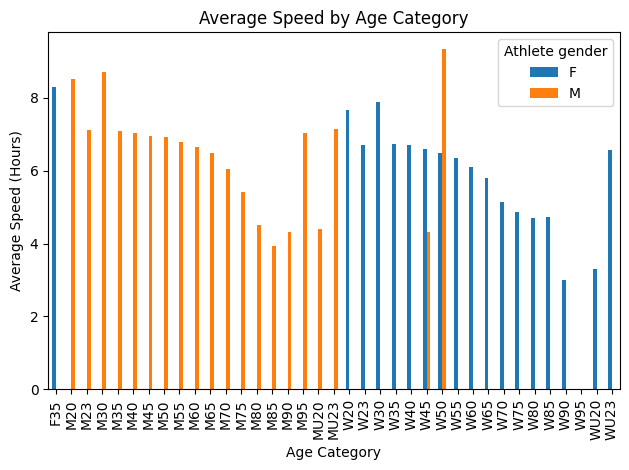

In [69]:
age_speed_correlation = df1.groupby(['Athlete age category', 'Athlete gender'])['Athlete average speed (hours)'].mean().unstack()
age_speed_correlation.plot(kind='bar', title='Average Speed by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average Speed (Hours)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [70]:
df_error_gender = df1[(df1['Athlete gender'] == 'M') & (df1['Athlete age category'].isin(['W45', 'W50']))]

In [71]:
df_error_gender

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete average speed (hours)
2255969,2019,21.07.2019,The Columbia Trail Masters (THA),50km,599,11:27:47 h,NaN,THA,1970.0,M,W45,4.362,746032,4.362
2637129,2020,27.09.2020,The Columbia Trail Masters (THA),50km,701,9:48:06 h,NaN,THA,1970.0,M,W45,5.101,746032,5.101
2702255,2020,12.-13.12.2020,Tanaosri Trail - TAB70 Day (THA),70km,118,19:59:32 h,NaN,THA,1970.0,M,W45,3.501,746032,3.501
3072563,2021,18.-19.12.2021,Ultra-Trail Nan100 (UTN100) (THA),100km,72,10:43:02 h,NaN,THA,1970.0,M,W50,9.331,746032,9.331


In [72]:
df1_cleaned = df1.drop(df_error_gender.index)

In [73]:
df1 = df1_cleaned

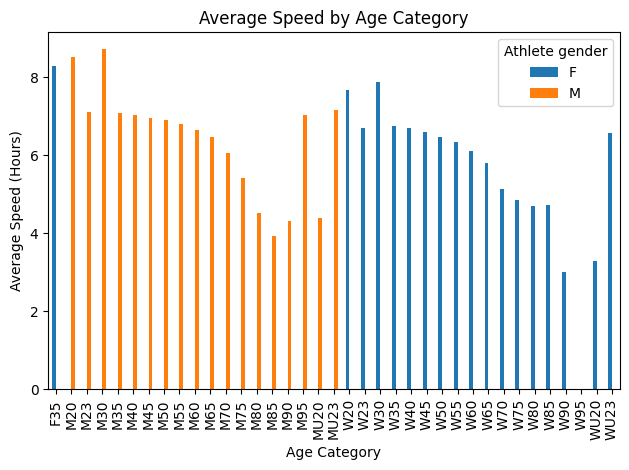

In [74]:
age_speed_correlation = df1.groupby(['Athlete age category', 'Athlete gender'])['Athlete average speed (hours)'].mean().unstack()
age_speed_correlation.plot(kind='bar', title='Average Speed by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average Speed (Hours)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### **4. Event Distance Analysis:**
### Which ultramarathon distances are most popular, and how does the average speed vary across different distances?

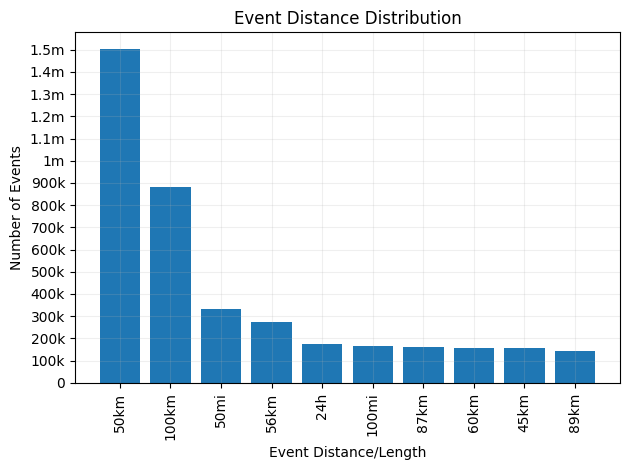

In [75]:
# Counting the occurrences of each event distance/length
distance_count = df1['Event distance/length'].value_counts().head(10)

# Plotting
plt.bar(distance_count.index, distance_count.values)

# Adding labels and title
plt.xlabel('Event Distance/Length')
plt.ylabel('Number of Events')
plt.title('Event Distance Distribution')

plt.xticks(rotation=90)
plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000],
           [0, '100k', '200k', '300k', '400k', '500k', '600k', '700k', '800k', '900k', '1m', '1.1m', '1.2m', '1.3m', '1.4m', '1.5m'])
plt.grid(True, alpha = 0.2)
# Display the plot
plt.tight_layout()  # Ensures labels fit within the figure area
plt.show()